In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt    
from dateutil.relativedelta import relativedelta  

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement= Base.classes.measurement
Station =Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f7e7edb5730>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f7e7da2e940>,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'latitude': 21.2716}

In [11]:
# Find the most recent date in the data set.

recent_date = session.query(func.max(Measurement.date)).scalar()
print (recent_date)

2017-08-23


In [12]:
oldest_date = session.query(func.min(Measurement.date)).scalar()
print (oldest_date)

2010-01-01


In [13]:
#Find year from most recent date
one_year_ago = dt.date(2017,8,23)- relativedelta(months = 12)
one_year_ago

datetime.date(2016, 8, 23)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the date and precipitation scores



# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date
results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
      filter(Measurement.date < recent_date).\
      filter(Measurement.date > one_year_ago).\
        order_by(Measurement.date).\
        group_by(Measurement.date).\
        all()

df = pd.DataFrame(results, columns = ["date", "precipitation"])
#df.columns = ["date", "precipitation"]
df = df.set_index("date")


df.head()


,precipitation
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


<function matplotlib.pyplot.show(close=None, block=None)>

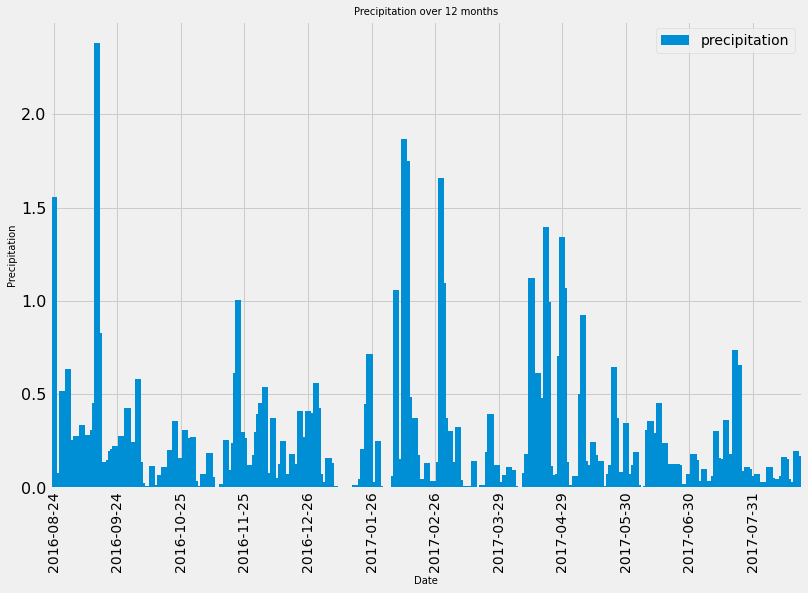

In [15]:
# Plot the precipitation for the past 12 months
ax = df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=12)
ax.tick_params(axis='y', labelsize=16)

plt.title("Precipitation over 12 months", size=10)
plt.ylabel("Precipitation", size=10)
plt.xlabel("Date", size=10)
plt.show

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,364.000000
mean,0.170090
std,0.296122
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).count()
print(station_count)

9


In [18]:
#see row
sample_row = session.query(Station).first()
sample_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f7e7da2e940>,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'latitude': 21.2716}

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
results =session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
print(results)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                      filter(Measurement.station == results[0][0]).all()
print(active_station_temps)

[(54.0, 85.0, 71.66378066378067)]


<function matplotlib.pyplot.show(close=None, block=None)>

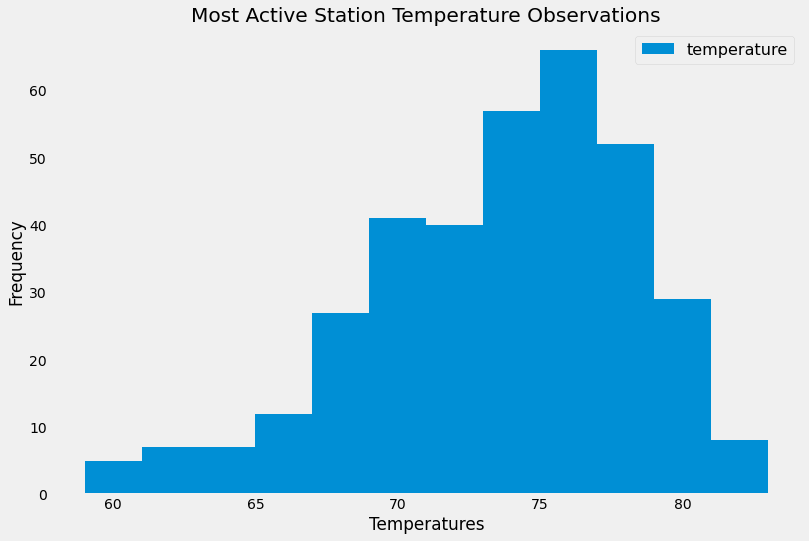

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.station, (Measurement.tobs)).\
      filter(Measurement.date < recent_date).\
      filter(Measurement.date > one_year_ago).\
      filter(Measurement.station == results[0][0]).\
        order_by(Measurement.date).\
        group_by(Measurement.date).\
        all()
#print(results)
df = pd.DataFrame(results, columns = ["station", "temperature"])



df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Most Active Station Temperature Observations")
plt.xlabel("Temperatures")
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
#plt.savefig("../StationTemps.png")
plt.show

# Close session

In [27]:
# Close Session
session.close()